<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

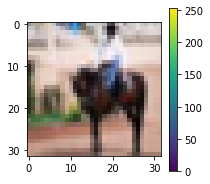

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
im = ax.imshow(x_train[11])
plt.colorbar(im)

plt.show()

In [4]:
y_train[11]

array([7], dtype=uint8)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
y_test = to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 69,706
Trainable params: 69,706
Non-trainable params: 0
____________________________________________________

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [13]:
history = model.fit(x = x_train, y=y_train, batch_size=128,epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 6s 12ms/step - loss: 1.6402 - accuracy: 0.4073 - val_loss: 1.4037 - val_accuracy: 0.4931
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.3108 - accuracy: 0.5367 - val_loss: 1.2388 - val_accuracy: 0.5626
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.1813 - accuracy: 0.5847 - val_loss: 1.1369 - val_accuracy: 0.6041
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0884 - accuracy: 0.6231 - val_loss: 1.0864 - val_accuracy: 0.6175
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0267 - accuracy: 0.6418 - val_loss: 1.0574 - val_accuracy: 0.6279
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9748 - accuracy: 0.6621 - val_loss: 1.0322 - val_accuracy: 0.6491
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9321 - accuracy: 0.6778 - val_loss: 1.0161 - val_accuracy: 0.6549

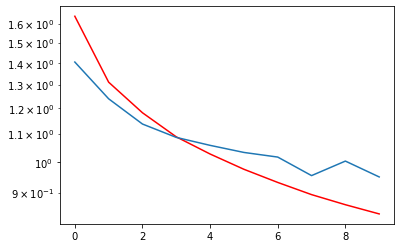

In [14]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])
plt.yscale("log")

In [17]:
np.argmax(model.predict(x_test[0][None]))

6

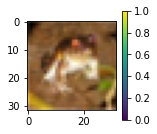

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(2,2)
im = ax.imshow(x_train[0])
plt.colorbar(im)

plt.show()